# Intro to Scientific Computing

### Homework 5

NAMES: Tyler Stewart , Rajdipa Chowdhury

DATE: 11/15/2017

## Earthquakes!

In this problem, we'll work with a data set from the following data source from the USGS:

http://earthquake.usgs.gov/data/centennial/

According to the USGS website, The Centennial Catalog (Engdahl and Villaseñor, 2002) (2.75MB PDF) is a global catalog of locations and magnitudes of instrumentally recorded earthquakes from 1900 to 2008. It is being periodically updated as new arrival time data for recent years become available.

This is a catalog of large earthquakes, created with the purpose of giving a realistic picture of the seismicity distribution in the Earth. It has been assembled by combining existing catalogs, reducing all available magnitudes for each earthquake to a common, corrected magnitude (same magnitudes as List of "Preferred Magnitudes of Selected Significant Earthquakes"-Word file), and relocating the earthquakes with available arrival time data.

For recent years (1964–present) a cut-off magnitude of 5.5 has been chosen for the catalog, and the catalog is complete down to that threshold. For the period prior to 1964 (also referred to as "historical instrumental" or simply "historical" period) the cut-off considered is magnitude 6.5. Between the 1930's and 1963 the catalog is complete to te magnitude 6.5 threshold, but prior to that, the catalog is only complete down to magnitude 7.0.

We have downloaded the full file and reformatted it into a .csv format. The lines of the file have the following column headers:

Date ,  Latitude (deg),  Longitude (deg),  Focal depth [km],  Magnitude (Richter)

** Download the file Earthquakes.csv from the folder data/ in Canvas and put it in the same folder as this notebook **

In [2]:
# If you're using IBM Data Science Workbench 
# uncomment the line below to install astropy
#  !pip install astropy

#first our standard packages
from numpy import *
%matplotlib inline
from matplotlib.pyplot import *
from astropy.io import ascii

### a) Read in the data

Use `ascii.read` to read data from the .csv file into an `astropy` Table object. Print the column names of your new Table (check the astropy Table documentation if you're not sure how to do that).  Note that the units for each column are given in the description above. 

In [3]:
import dateutil.parser as dparser
from datetime import *
ascii.read("Earthquakes.csv")
earth = ascii.read("Earthquakes.csv")
print earth
#-Tyler

    Date_string     Latitude Longitude Focal_depth_[km] Magnitude
------------------- -------- --------- ---------------- ---------
1900-01-05 19:00:00     -3.0     102.0              0.0       7.0
1900-01-11 09:07:00     -5.0     148.0              0.0       7.0
1900-01-18 07:46:00     44.5     148.5             35.0       6.7
1900-01-20 06:33:00     20.0    -105.0              0.0       7.3
1900-01-31 19:22:00     48.0     146.0            450.0       7.5
1900-04-24 23:16:00     27.0     126.5             35.0       6.9
1900-05-11 17:23:00     38.7     141.1              5.0       7.0
1900-05-16 20:12:00     20.0    -105.0              0.0       6.9
1900-06-21 20:52:00     10.0     -85.5              0.0       7.2
1900-07-29 06:59:00    -10.0     165.0              0.0       7.6
                ...      ...       ...              ...       ...
2007-09-26 12:36:26    -5.01    153.48             35.0       6.8
2007-09-26 15:43:02    -1.78     99.46             35.0       6.1
2007-09-27

### b) Convert date-strings into date-time objects

**Dates in Python**

A lot of data that we might want to read is time-series data: measurements taken across different dates and times.  Dates and times are tricky to deal with in the sense that the calendar is complicated(!), there are leap days, daylight savings, etc! 

Unless you use a specialized python package that handles date strings and allows to work with them (like pandas), when reading time-series data from a file we read it in form of a string.  That means that the date ```2000-01-12``` will be interpreted as a string, and that makes it difficult to compare with other dates in the file.

The packages ```dateutil``` and ```datetime``` allow us to use data to perform operations like finding the diference in time between two events. Import these packages in the cell below:

```python
import dateutil.parser as dparser
from datetime import *
```

In order to be able to operate with dates we need to create  a datetime object. This is done using ```datetime```. Remember you can see how ```datetime``` works by doing:

```python
datetime?
```
in a code cell.

A datetime object is a special type of data, it contains the complicated information of a date, and allows us to operate on it. For example, we can  define two datetime objects and obtain the time difference between them:

In [4]:
datetime?

In [5]:
# this constructs a datetime object
datetime(2016,04,25)
# which we can subtract to another time object to get time differences
datetime(2016,04,25) - datetime(2009,05,25)

datetime.timedelta(2527)

The result in parenthesis `(2527)` is simply the number of days inbetween the two events. When you print the result of this operation you get a nicer format:

In [6]:
print datetime(2016,04,25) - datetime(2009,05,25)

2527 days, 0:00:00


The previous operation returns a new kind of object ```datetime.timedelta()``` which reprsents the time difference between two ```datetime``` objects. 

### Parsing dates from strings:

Parsing a date means converting it from its string form ```"April 25,2016"``` to a ```datetime``` object on which we can operate (like the objects we used before).

We have a string (a collection of characters) that represent a date:

```
"April 25,2016"
```

Using the function `dparser.parse()` we can parse (transform) this string into an object that can be operated on:

In [7]:
# here in Month, day, year format
dparser.parse("April 25,2016")

datetime.datetime(2016, 4, 25, 0, 0)

In [8]:
# we can assign the result of a parse operation to a variable
parseddate = dparser.parse("April 25,2016")

# and use it later
print parseddate

2016-04-25 00:00:00


This function is able to recognize different string formats used for dates:

In [9]:
# n yyyymmdd hh:mm:ss format
dparser.parse("20001028 12:37:01")

datetime.datetime(2000, 10, 28, 12, 37, 1)

In [10]:
# in yyyy-mm-dd hh:mm:ss format
dparser.parse('1981-12-26 9:43:02')

datetime.datetime(1981, 12, 26, 9, 43, 2)

The first entry in a datetime object is the year, followed by the month, day, hour, minute and finally second. This way we can get the difference between two definite events.

In [11]:
print datetime(2015,04,22,5,34,01) - datetime(2015,04,25,5,30,01)

-3 days, 0:04:00


In [12]:
datetime(2015,04,22,5,34,01) - datetime(2015,04,25,5,30,01)

datetime.timedelta(-3, 240)

### Adding a new column to a table

In class we saw an example of how to add a new column to a table read from a file. The notebook ```Notes_Class_14-15``` contains an example of how to do this.


* Add a new column to the table you read from `Earthquakes.csv` containing all parsed (transformed) dates. This new column will allow us to do operations like comparing or substracting dates, which we can't do with the dates in a string format. 

    * Similar to what we did with a single date (in string format), you'll have to apply the function `dparser.parse()` to each one of the elements of the column containing the date (in string format). 
    * This can be accomplished either with the function `map` or with a `for` loop over entries in the table.

* Print the zeroth element of your new column. And print is data type (it should be a datetime object).

In [13]:
map(dparser.parse,earth['Date_string'])
earth['Date_parsed'] = map(dparser.parse,earth['Date_string'])
#-Tyler

In [14]:
# print earth.colnames
print earth.colnames
print len(earth['Date_string'])
print len(earth['Date_parsed'])
print earth['Date_string']
print earth['Date_parsed']

['Date_string', 'Latitude', 'Longitude', 'Focal_depth_[km]', 'Magnitude', 'Date_parsed']
13541
13541
    Date_string    
-------------------
1900-01-05 19:00:00
1900-01-11 09:07:00
1900-01-18 07:46:00
1900-01-20 06:33:00
1900-01-31 19:22:00
1900-04-24 23:16:00
1900-05-11 17:23:00
1900-05-16 20:12:00
1900-06-21 20:52:00
1900-07-29 06:59:00
                ...
2007-09-26 12:36:26
2007-09-26 15:43:02
2007-09-27 19:57:49
2007-09-28 01:01:48
2007-09-28 01:35:51
2007-09-28 11:16:39
2007-09-28 13:38:59
2007-09-29 05:37:06
2007-09-30 02:08:29
2007-09-30 05:23:34
2007-09-30 09:47:51
Length = 13541 rows
    Date_parsed    
-------------------
1900-01-05 19:00:00
1900-01-11 09:07:00
1900-01-18 07:46:00
1900-01-20 06:33:00
1900-01-31 19:22:00
1900-04-24 23:16:00
1900-05-11 17:23:00
1900-05-16 20:12:00
1900-06-21 20:52:00
1900-07-29 06:59:00
                ...
2007-09-26 12:36:26
2007-09-26 15:43:02
2007-09-27 19:57:49
2007-09-28 01:01:48
2007-09-28 01:35:51
2007-09-28 11:16:39
2007-09-28 13:38:59

### c) The big one
What was the magnitude of the largest Earthquake recorded on Earth **during the 20th Century**?

In [15]:

mag1 = earth['Date_parsed'] >= datetime(1900, 1, 1, 1, 1, 1)
mag2 = earth['Date_parsed'] <= datetime(1999, 12, 31, 23, 59, 59)
mag =logical_and(mag1,mag2)
print mag
max(earth['Magnitude'][mag])
#-Tyler with help from Aldo

[ True  True  True ..., False False False]


9.5999999999999996

### d) The big one, part II
Using data selection techniques, find: When did the largest Earthquake occur? What was it's depth?

In [16]:
print max(earth['Magnitude'])
date = earth['Magnitude'] == 9.6
print earth['Date_parsed'][date]
print earth['Focal_depth_[km]'][date]
#-Tyler

9.6
    Date_parsed    
-------------------
1960-05-22 19:11:17
Focal_depth_[km]
----------------
            35.0


### e) Full distribution
Construct a histogram that shows the frequency of Earthquakes of different magnitudes in the entire dataset. The x-axis should run from M=5.5 to M=9.5, the axes should be labeled, and the histogram should contain 40 bins.

Use your internet searching habilities to find a function from matplotlib that makes histograms, and understand how it works.

In [17]:
hist?

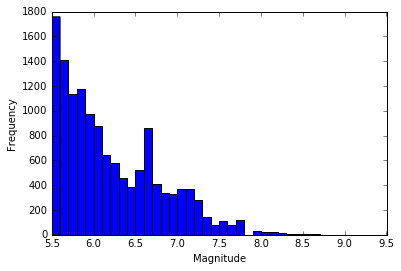

In [18]:
hist(earth['Magnitude'],40,range=[5.5,9.5]) #40 is equal to the number of bins. Range is equal to the range
xlabel('Magnitude')
ylabel('Frequency')
#-Tyler

### f) Magnitude vs Depth
Make a plot of Earthquake magnitude vs. depth (using points -- you can do this using the scatter() function from matplotlib). 

https://matplotlib.org/examples/shapes_and_collections/scatter_demo.html

Use transparency for the individual points so that the amount of overlap can be sensed. Remember to label your axes. Try a log-scale on the depth-axis. 

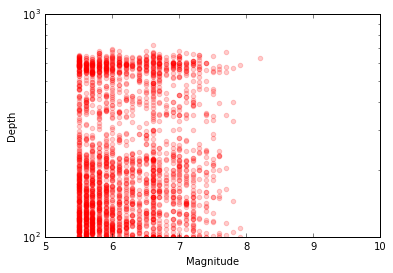

In [19]:
scatter(earth['Magnitude'],earth['Focal_depth_[km]'],color = 'red',alpha=0.2)
ylabel('Depth')
xlabel('Magnitude')
yscale('log')
#-Tyler

### g) Median and mean depths

1) What is the median and mean depth for Earthquakes with magnitude larger than 8? 

2) How does this compare to the median and mean depth of all the Earthquakes in the table?

(There might be numpy functions that can help you do this, use your googling skills)

In [20]:
mean?

In [21]:
median?

In [22]:
mag8 = earth['Magnitude'] > 8
print mean(earth['Focal_depth_[km]'][mag8])
print median(earth['Focal_depth_[km]'][mag8])
print mean(earth['Focal_depth_[km]'])
print median(earth['Focal_depth_[km]'])
#-Tyler

38.85
33.85
75.2748763016
34.3


### h) Waiting for  an 8 ...

1) What was the largest length of time between two successive magnitude 8 (or larger) earthquakes? 

2) What was the shortest amount of time between two magnitude 8 earthquakes? (hint: The numpy function "diff" may be useful to you here). 

In [27]:
mag8x = earth['Magnitude'] >= 8
date_mag8 = sorted(earth['Date_parsed'][mag8x]) #to sort the magnitudes wrt the date parsed 
delta_date = diff(date_mag8)    #to calculate the discrete difference 
the_largest_length_of_time = max(delta_date) 
the_smallest_length_of_time = min(delta_date)
print "the  largest length of time between two successive magnitude 8 (or larger) earthquakes", the_largest_length_of_time
print " the shortest amount of time between two magnitude 8 or larger earthquakes" the_smallest_length_of_time

#Rajdipa_and_tyler


the  largest length of time between two successive magnitude 8 (or larger) earthquakes 2147 days, 4:00:30
0:29:00


### i) GET IT ON THE GLOBE!
The following code imports a useful package called basemap, which is a library of mapping methods.

Try this code snippet to produce a basic map of the earthquake locations. 

**Note: If you obtain an error when loading Basemap, that means that it is not installed in your Anaconda distribution. Try googling how to install 'Basemap' in Anaconda, you might be able to solve this on your own.**

Take a look at this website with cool examples on how you can use this library.

https://matplotlib.org/basemap/users/examples.html


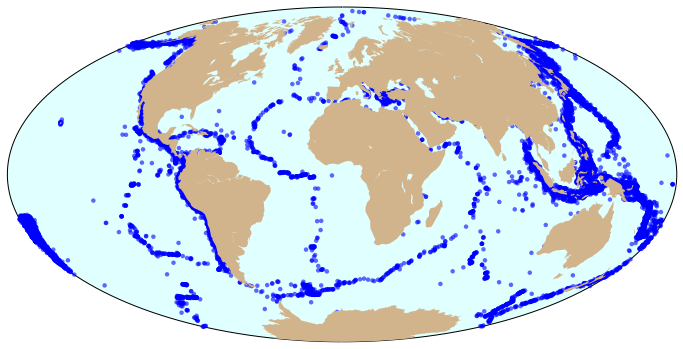

In [24]:
from mpl_toolkits.basemap import Basemap

figure(figsize=(12,8))

# This here constructs Earth's 2D map using the hammer projection
m = Basemap(projection='hammer',lon_0=0)

# This defines the coordinates to be used as longitude and latitude
x, y = m(earth['Longitude'],earth['Latitude'])

# This colors the entire map
m.drawmapboundary(fill_color='LightCyan')

# This draws the continents using a color for land and another for lakes
m.fillcontinents(color='Tan',lake_color='LightCyan')

# This uses the scatter()  cuntion plots the earthquakes on top of the map 
# using the longitude and latitude as coordinates
m.scatter(x,y,marker='o',
          alpha=0.6,
          edgecolor='None')

### j) An even better map!

Modify the above block of code to map the distribution of ** magnitude 6 and larger earthquakes **, 
 - with log10 of earthquake depths shown as point color and
 - point size proportional to earthquake magnitudes  (look at the documentation of `scatter` to learn how to do these). 
 - Add a labeled colorbar to the plot. 
 - Center the view from above the International Date Line.

Look at the matplotlib colormap documentation and choose a colormap for your scatter plot that you think looks good.  Also feel free to change the ocean and continent colors. 

In [25]:
scatter?


/Users/RAJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: RuntimeWarning: divide by zero encountered in log10


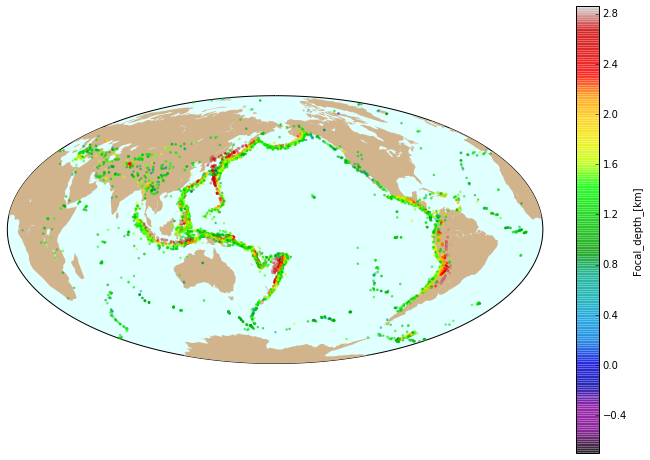

In [26]:
from mpl_toolkits.basemap import Basemap

mag6 = earth['Magnitude'] >= 6

figure(figsize=(12,8))

# This here constructs Earth's 2D map using the hammer projection
m = Basemap(projection='hammer',lon_0=180)     #changing the center view to the International Date line

# This defines the coordinates to be used as longitude and latitude
x, y = m(earth['Longitude'][mag6],earth['Latitude'][mag6])

# This colors the entire map
m.drawmapboundary(fill_color='LightCyan')

# This draws the continents using a color for land and another for lakes
m.fillcontinents(color='Tan',zorder=0,lake_color='LightCyan')

# This uses the scatter()  cuntion plots the earthquakes on top of the map 
# using the longitude and latitude as coordinates
m.scatter(x,y,marker='o',alpha=0.6,s=earth['Magnitude'][mag6]
          ,c = log10(earth['Focal_depth_[km]'][mag6])
          ,cmap='spectral'
          ,edgecolor='None')
colorbar(label='Focal_depth_[km]')

#rajdipa_and_tyler

## Optional: More fun with maps! 

Look at the 'basemap' documentation. Did we pick a reasonable projection? How does our data look plotted in some of the other projections? Experiment with these, or with zooming in on a region of the world. The data are closely packed along the pacific rim -- try making some maps zoomed in on those regions.  
